In [ ]:
!pip install tensorflow opencv-python matplotlib


In [ ]:
import tensorflow as tf
import os
import cv2 
import imghdr
from matplotlib import pyplot as plt

In [ ]:
gpu = tf.config.experimental.list_physical_devices("CPU")
# gpus = tf.config.experimental.set_memory_growth("GPU",True)
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
data_dir='/content/gdrive/MyDrive/projects/20-may-2023/data'
image_ext=['jpeg','jpg','bmp','png']
os.listdir(os.path.join(data_dir,"happy"))

In [ ]:
for img_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir , img_class)):
    img_path = os.path.join(data_dir,img_class,image)
    try:
      img = cv2.imread(img_path) #allows me yo open image as np array
      tip = imghdr.what(img_path)
      if tip  not in image_ext:
        print("Image not in extensions list {} ".format(img_path))
        os.remove(img_path)
    except Exception as e:
      print("Issue with image{}".format(img_path))



In [ ]:
# imgg =cv2.imread(os.path.join('/content/gdrive/MyDrive/projects/20-may-2023/data','happy','friends_190412.jpg'))
# plt.imshow(cv2.cvtColor(imgg,cv2.COLOR_BGR2RGB))

# Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir) #build the data imageset on the fly , build the classes and labels..etc
#build a pipeline and image_dataset_from_directory automatically reshape the data to ensure theyre in conistant size

Found 278 files belonging to 2 classes.


In [ ]:
'''الداتا اللي فوق دي مجرد جينيريتور عشان نعرف نلف جو ا لداتا و الصور الحقيقيةي لازم نحولهم لنامباي اراي'''
data_iterator = data.as_numpy_iterator() #allowing us to access the pipeline
batch = data_iterator.next() #this actually accessing the pipeline
len(batch) #=2  #1 image # 2 labe;
batch[0] #images in nupmy array form
batch[1] #2 classes



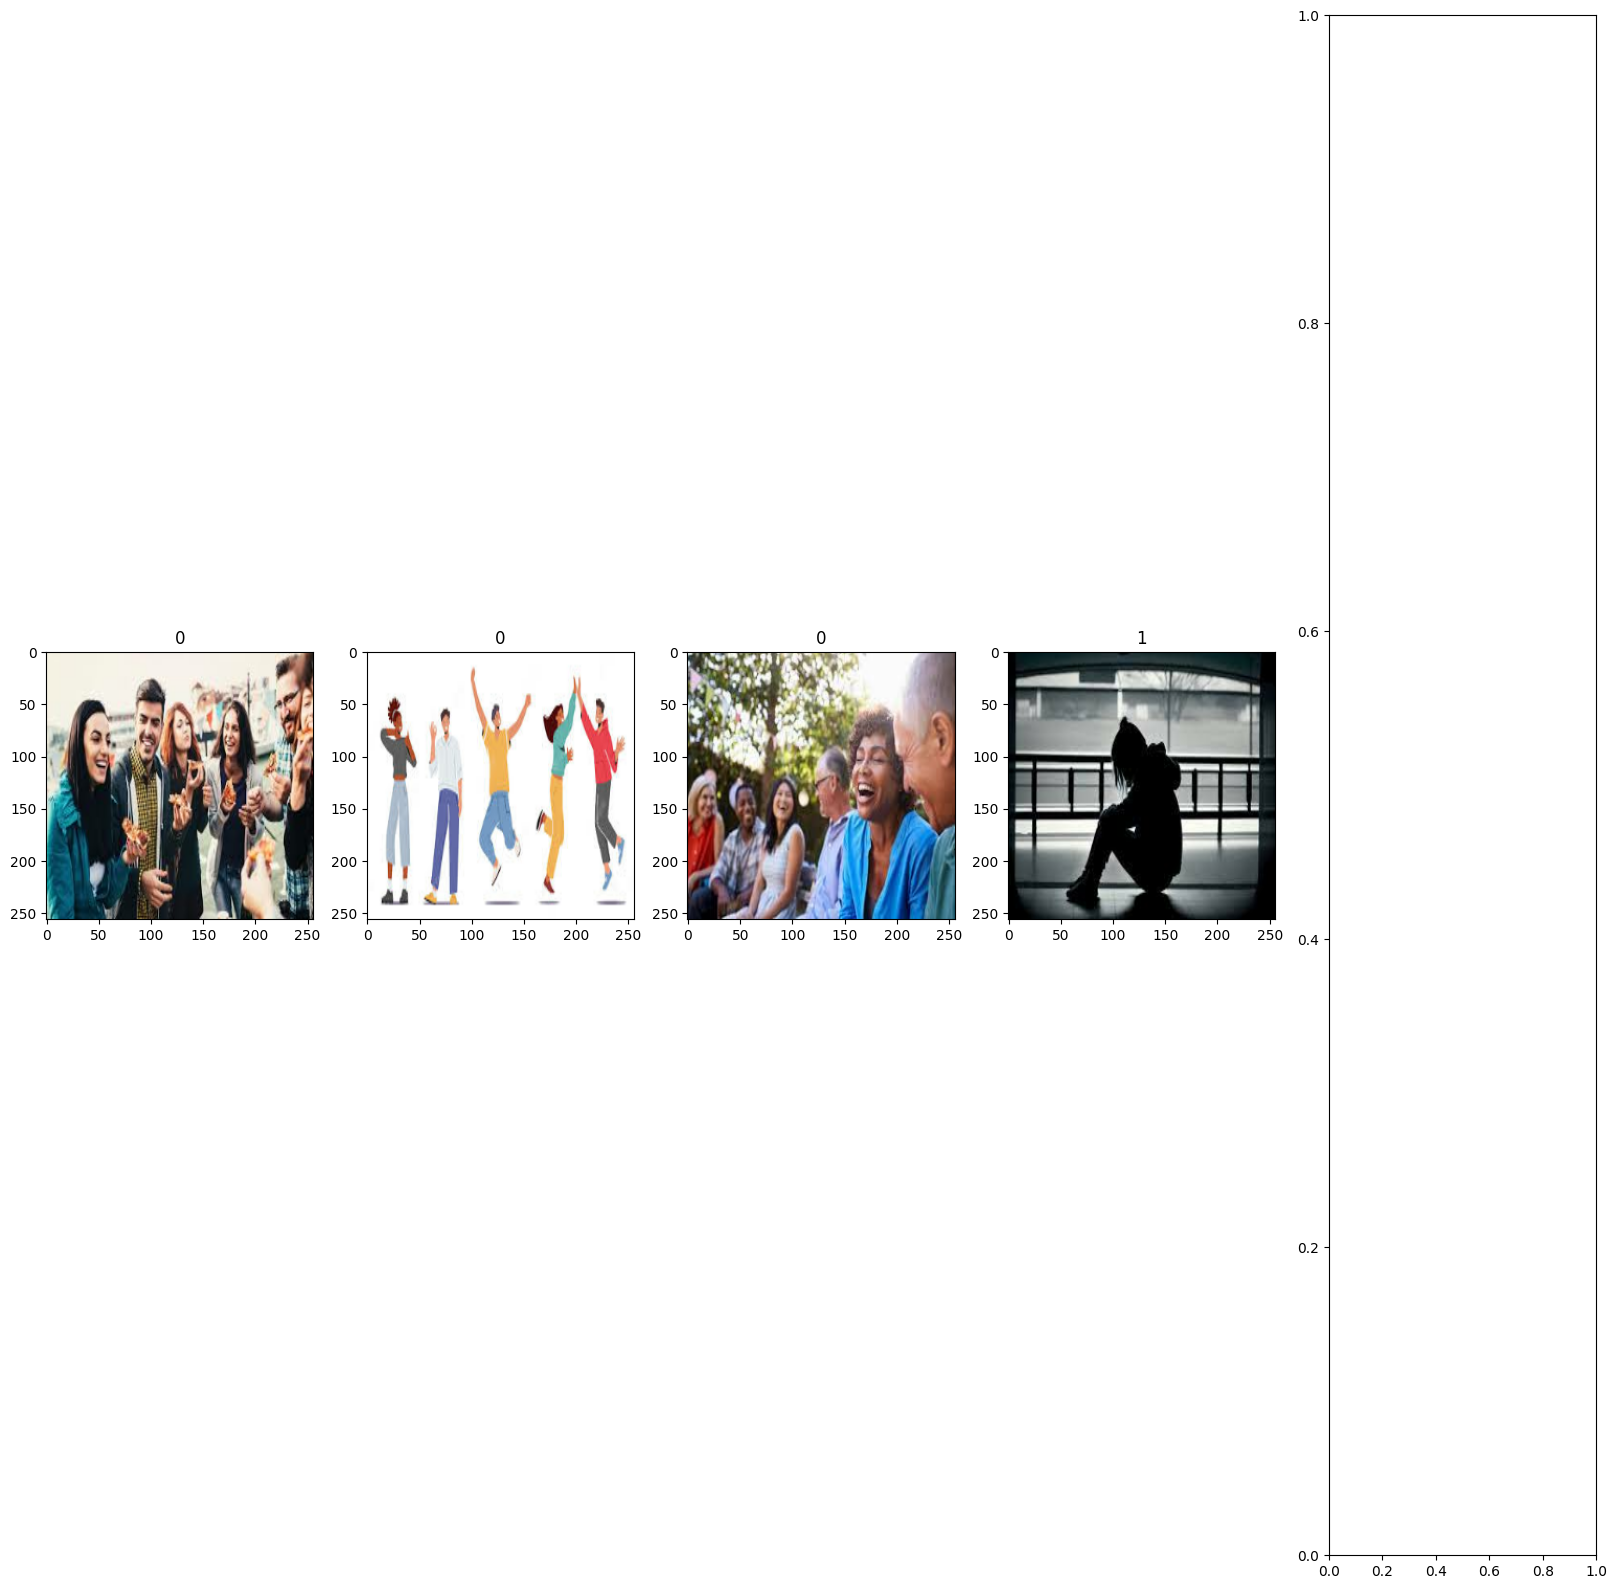

In [ ]:
#check whic class is 0 and which is 1
fig , ax  = plt.subplots(ncols=5,figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])
#1 sad #0 happy

# Preprocessing data

In [ ]:
#make the scale from 0 to 1
data = data.map(lambda x,y :(x/255 ,y))  #x images , y labels 
scaled = data.as_numpy_iterator().next()
scaled[0].max()

1.0

In [ ]:
from matplotlib.cm import datad
#Split the data
# print(len(data))
train_size = int(len(data)*0.7)+1
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1


train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

print(len(val))

1


#Build Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten ,Dropout

In [ ]:
from keras.api._v2.keras import activations
model = Sequential()

model.add(Conv2D(16, (3,3) ,1, activation = 'relu' , input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3) ,1, activation = 'relu' ))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3) ,1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256 ,activation = 'relu'))
model.add(Dense(1 ,activation = 'sigmoid'))

In [ ]:
model.compile('adam' , loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
# model.summary()

#Train

In [ ]:
log_dir='/content/gdrive/MyDrive/projects/20-may-2023/log_dir'
#call backs to save model to specifc  chkpnt 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)

In [ ]:
#model fitting (training)
hist = model.fit(train , epochs=20 , validation_data = val , callbacks = [tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 17s 432ms/step - loss: 0.8538 - accuracy: 0.4911 - val_loss: 0.6718 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 8s 901ms/step - loss: 0.6743 - accuracy: 0.5446 - val_loss: 0.6152 - val_accuracy: 0.5938
Epoch 3/20
7/7 [==============================] - 5s 475ms/step - loss: 0.6251 - accuracy: 0.6875 - val_loss: 0.5896 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 5s 474ms/step - loss: 0.5075 - accuracy: 0.7634 - val_loss: 0.5081 - val_accuracy: 0.7188
Epoch 5/20
7/7 [==============================] - 5s 394ms/step - loss: 0.5699 - accuracy: 0.7232 - val_loss: 0.3867 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 5s 399ms/step - loss: 0.4418 - accuracy: 0.8170 - val_loss: 0.6522 - val_accuracy: 0.5000
Epoch 7/20
7/7 [==============================] - 6s 587ms/step - loss: 0.3776 - accuracy: 0.8438 - val_loss: 0.3039 - val_accuracy: 0.9688
Epoch 8/20
7/7 [===

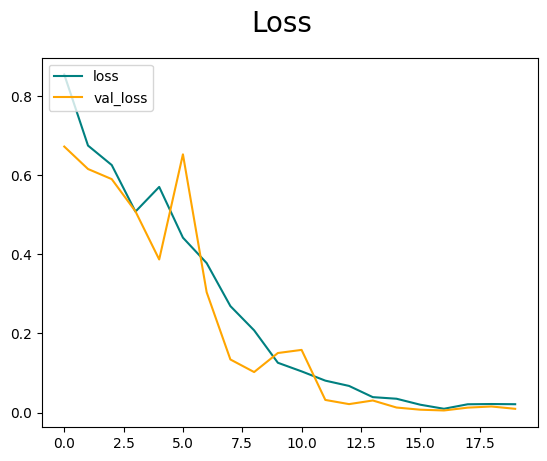

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

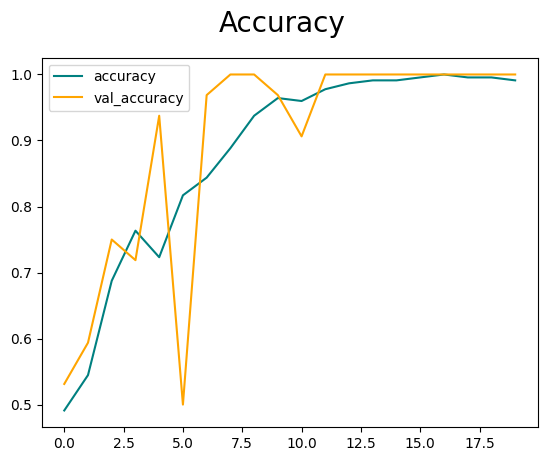

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 403ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()} , Recall: {re.result().numpy()} , Accuracy: {acc.result().numpy()}')


Precision: 1.0 , Recall: 1.0 , Accuracy: 1.0


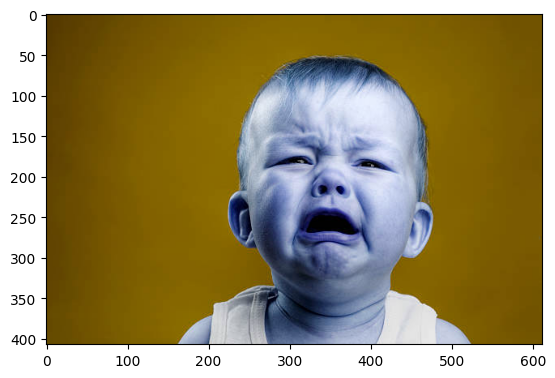

In [ ]:
import cv2
img = cv2.imread('/content/sadtest.jpg')
plt.imshow(img)
plt.show()

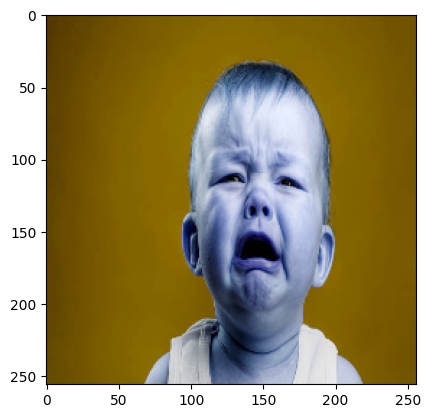

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 20ms/step


array([[0.7098417]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
